In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
# 공부시간.
x1 = [2, 4, 6, 8]

# 과외시간.
x2 = [0, 4, 2, 3]

# 성적.
y = [81, 93, 91, 97]

print(x1)
print(x2)
print(y)

[2, 4, 6, 8]
[0, 4, 2, 3]
[81, 93, 91, 97]


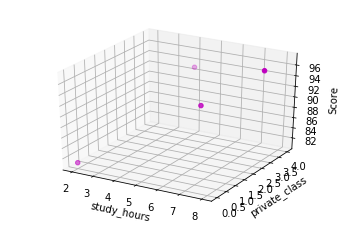

In [3]:
ax = plt.axes(projection='3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('Score')
ax.dist = 11
ax.scatter(x1, x2, y, c='m')
plt.show()

In [4]:
# ndarray 생성.
x1_data = np.array(x1)
x2_data = np.array(x2)
y_data = np.array(y)
print(x1_data)
print(x2_data)
print(y_data)

[2 4 6 8]
[0 4 2 3]
[81 93 91 97]


In [5]:
# 기울기의 절편.
a = 0
b1 = 0
b2 = 0

# 학습률.
lr = 0.025

# 반복 횟수
epochs = 2000

In [6]:
# 경사 하강법.
for i in range(epochs) : 
    # 예측 결과 계산.
    y_pred = a + b1 * x1_data + b2 * x2_data 
    # print(y_pred)
    
    # 오차 계산.
    error = y_data - y_pred
    # print(error)
    
    # 미분.
    b1_diff = -(2 / len(x1_data)) * sum(x1_data * error)
    b2_diff = -(2 / len(x2_data)) * sum(x2_data * error)
    a_diff = -(2 / len(x1_data)) * sum(error)
    
    # print(b1_diff)
    # print(b2_diff)
    # print(a_diff)
    
    # 기울기와 절편 업데이트.
    b1 = b1 - lr * b1_diff
    b2 = b2 - lr * b2_diff
    a = a - lr * a_diff
    # print(b1)
    # print(b2)
    # print(a)
    
    if i % 100 == 0 :
        print(f'epoch : {i}, 절편 : {a}, 기울기1 : {b1}, 기울기2 : {b2} ')

epoch : 0, 절편 : 4.525, 기울기1 : 23.200000000000003, 기울기2 : 10.5625 
epoch : 100, 절편 : 43.97569356791495, 기울기1 : 6.434805446608687, 기울기2 : 3.9892552489289104 
epoch : 200, 절편 : 62.576629969168025, 기울기1 : 3.725534875984788, 기울기2 : 3.0541408134809767 
epoch : 300, 절편 : 70.96564181265174, 기울기1 : 2.5037146792877483, 기울기2 : 2.63227425306345 
epoch : 400, 절편 : 74.74908051776274, 기울기1 : 1.952674645725861, 기울기2 : 2.4420125981801006 
epoch : 500, 절편 : 76.45540883097016, 기울기1 : 1.7041559609856516, 기울기2 : 2.3562047195904308 
epoch : 600, 절편 : 77.22496175342586, 기울기1 : 1.5920742011940092, 기울기2 : 2.3175054240167414 
epoch : 700, 절편 : 77.57202960424704, 기울기1 : 1.5415254028566499, 기울기2 : 2.300052067722291 
epoch : 800, 절편 : 77.72855697170772, 기울기1 : 1.5187279287796696, 기울기2 : 2.29218061576366 
epoch : 900, 절편 : 77.79915070923246, 기울기1 : 1.5084462832928398, 기울기2 : 2.28863059622062 
epoch : 1000, 절편 : 77.83098843741102, 기울기1 : 1.503809268088436, 기울기2 : 2.287029539792629 
epoch : 1100, 절편 : 77.845347231421

In [7]:
# 예측 결과를 추출.
y_pred = a + b1 * x1_data + b2 * x2_data 
y_pred

array([80.85713635, 92.99999802, 91.42857119, 96.71428861])

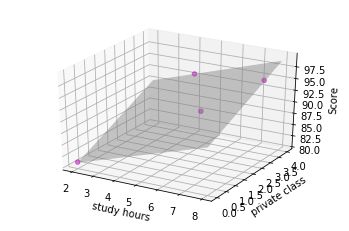

In [8]:
import statsmodels.api as statm
import statsmodels.formula.api as statfa
#from matplotlib.pyplot import figure

# [공부시간, 과외시간, 성적]을 담은 리스트가 총 4개로 이루져 있는 데이터.
data = [[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]

# 설명변수와 종속변수로 나눔.
X = [i[0:2] for i in data]
y = [i[2] for i in data]

# 상수 1을 붙여줌으로써 디자인 행렬 X 생성.
X_1 = statm.add_constant(X)

# 다중 회귀 적합.
results = statm.OLS(y, X_1).fit()
# results.summary()

# 다른 방식.
# 공부 + 과외 학습 시간 데이터 프레임화.
hour_class = pd.DataFrame(X, columns=['study_hours','private_class'])

# 종속변수 추가.
hour_class['Score'] = pd.Series(y)

# 모델 적합.
model = statfa.ols(formula='Score ~ study_hours + private_class', data=hour_class)
results_formula = model.fit()
# results_formula.summary()

# np.meshgrid() : 1 차원 좌표 배열 x1, x2,…, xn 에서 N차원 직사각형으로 구성.
a, b = np.meshgrid( np.linspace(hour_class.study_hours.min(), hour_class.study_hours.max(), 100),
                   np.linspace(hour_class.private_class.min(), hour_class.private_class.max(), 100) )

# ravel() : 다차원을 1차원으로 변환.
X_ax = pd.DataFrame({'study_hours' : a.ravel(), 'private_class' : b.ravel()})

# 예측값 계산.
fittedY = results_formula.predict(exog=X_ax)

# 시각화.
fig = plt.figure()
graph = fig.add_subplot(111, projection='3d')
graph.scatter( hour_class['study_hours'], hour_class['private_class'], hour_class['Score'], marker='o', alpha=0.5, c='m')
graph.plot_surface(a, b, fittedY.values.reshape(a.shape), rstride=1, cstride=1, color='grey', alpha=0.5)
graph.set_xlabel('study hours')
graph.set_ylabel('private class')
graph.set_zlabel('Score')
graph.dist = 11
plt.show()